In [1]:
from samana.Data.j0659 import J0659_MIRI
from samana.Model.j0659_model import J0659ModelEPLM3M4Shear
import numpy as np
import matplotlib.pyplot as plt
from lenstronomy.Workflow.fitting_sequence import FittingSequence
import h5py

In [3]:
data = J0659_MIRI()
model = J0659ModelEPLM3M4Shear(data, shapelets_order=1)
kwargs_lens_macro_init = None

kwargs_model, _, _, _, _ = model.setup_kwargs_model(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_params = model.kwargs_params(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_likelihood = model.kwargs_likelihood

fitting_sequence = FittingSequence(data.kwargs_data_joint, kwargs_model, model.kwargs_constraints, 
                                  kwargs_likelihood, kwargs_params)

nthreads = 8
psf_symmetry = 1
fitting_kwargs_list = [
        ['update_settings', {'lens_add_fixed': [[0, ['a4_a', 'a3_a'], [0.0, 0.0]]]}],
        ['PSO', {'sigma_scale': 1., 'n_particles': 10, 'n_iterations': 100, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': psf_symmetry, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 25, 'n_iterations': 50, 'threadCount': nthreads}],
    #['psf_iteration', {'psf_symmetry': psf_symmetry, 'keep_psf_error_map': True, 'num_iter': 25}],
    #['PSO', {'sigma_scale': 1., 'n_particles': 25, 'n_iterations': 50, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 4, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 25, 'n_iterations': 50, 'threadCount': nthreads}],
        #['MCMC', {'n_burn': 50, 'n_run': 25, 'walkerRatio': 4, 'sigma_scale': 0.1, 'threadCount': nthreads}]
                          ]
chain_list = fitting_sequence.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_sequence.best_fit()

/Users/danielgilman/Code/external/lenstronomy/lenstronomy/LensModel/MultiPlane/multi_plane.py:77: UserWarning: Cosmology is provided. Make sure your cosmological model is consistent with the cosmology_model argument.
  warnings.warn(


Computing the PSO ...


  0%|                                                                                                                                                                | 0/100 [00:00<?, ?it/s]/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
  3%|████▌                                                                                                                                                   | 3/100 [00:01<00:36,  2.63it/s]/Users/danielgilman/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:175: R

Max iteration reached! Stopping.
-1.0571000856389632 reduced X^2 of best position
-2060.2880669103392 log likelihood
3898 effective number of data points
[{'theta_E': 2.1178010339183775, 'gamma': 2.1488294034986257, 'e1': -0.08323928920648195, 'e2': -0.045913923726029246, 'center_x': -0.012725465331397475, 'center_y': -0.2241834751272811, 'a1_a': 0.022518075137497266, 'delta_phi_m1': -0.005787571007954338, 'a3_a': 0.0, 'delta_phi_m3': 0.4377988884446635, 'a4_a': 0.0, 'delta_phi_m4': 2.0395730216191805}, {'gamma1': 0.04399660516420164, 'gamma2': 0.09505879387463385, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.3385155715464802, 'center_x': 0.3425847346969016, 'center_y': 1.5543024450945742}] lens result
[{'amp': 1, 'R_sersic': 0.5585620833308579, 'n_sersic': 4.694717376728393, 'e1': -0.09436611058598687, 'e2': -0.21251638884650537, 'center_x': -0.4844267829083564, 'center_y': -0.13751843972371353}, {'amp': 1, 'n_max': 1, 'beta': 0.040333635762293193, 'center_x': -0.4844267829083564, 'cente

-0.764338514415009 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.764338514415009
(31, ['gamma_lens0', 'a1_a_lens0', 'delta_phi_m1_lens0', 'delta_phi_m3_lens0', 'delta_phi_m4_lens0', 'gamma1_lens1', 'gamma2_lens1', 'theta_E_lens2', 'R_sersic_source_light0', 'n_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'beta_source_light1', 'R_sersic_lens_light0', 'n_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0', 'R_sersic_lens_light1', 'n_sersic_lens_light1', 'center_x_lens_light1', 'center_y_lens_light1', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_y_image', 'delta_y_image', 'delta_y_image', 'delta_y_image'])


/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:68: RuntimeWarning: divide by zero encountered in log10
  log_model = np.log10(model)
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:161: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/danielgilman/Code/external/lenstronomy/lenstronomy/Plots/model_band_plot.py:225: RuntimeWarning: divide by zero encountered in log10
  np.log10(self._model),


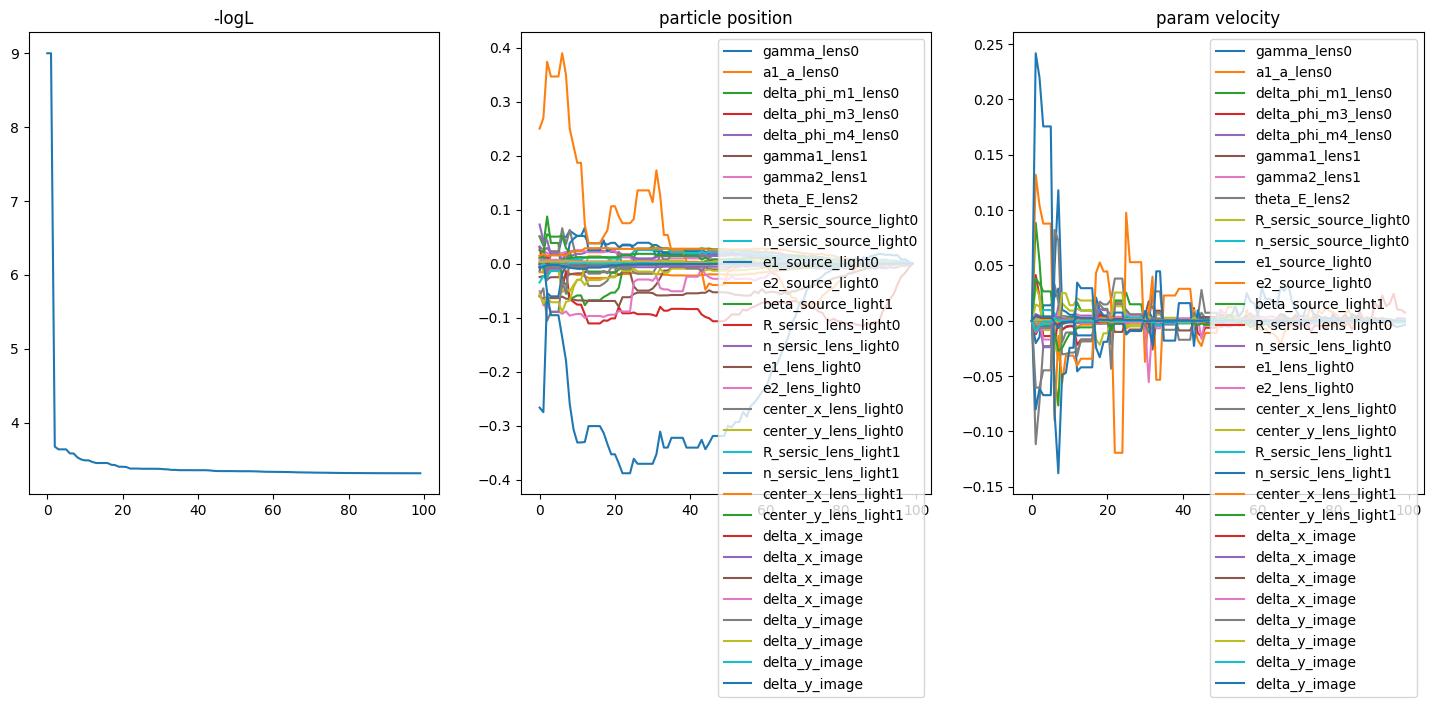

<Figure size 640x480 with 0 Axes>

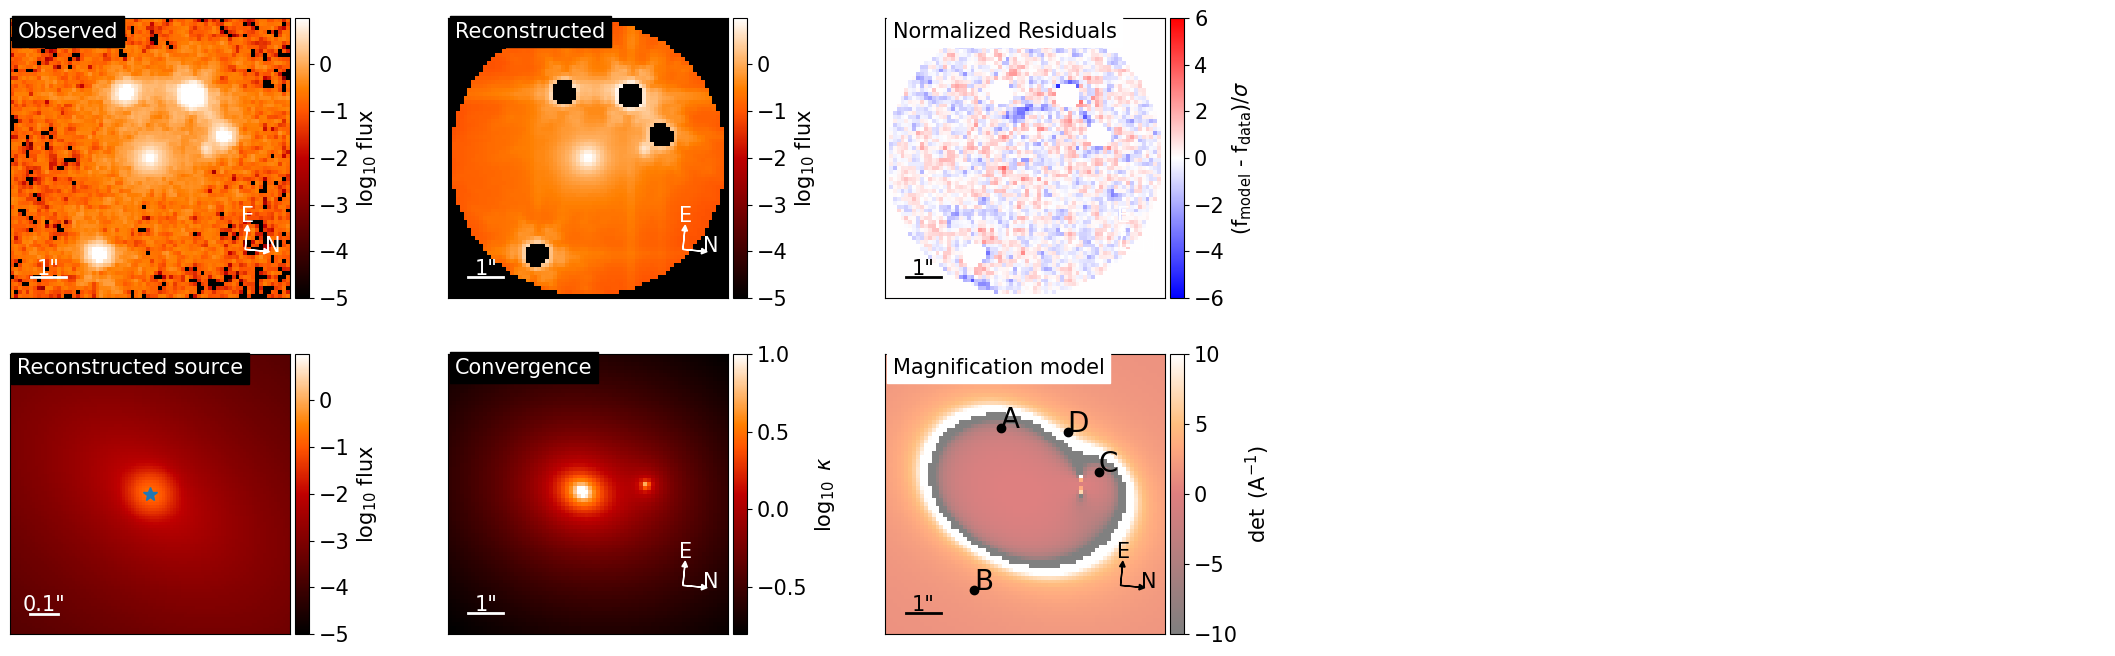

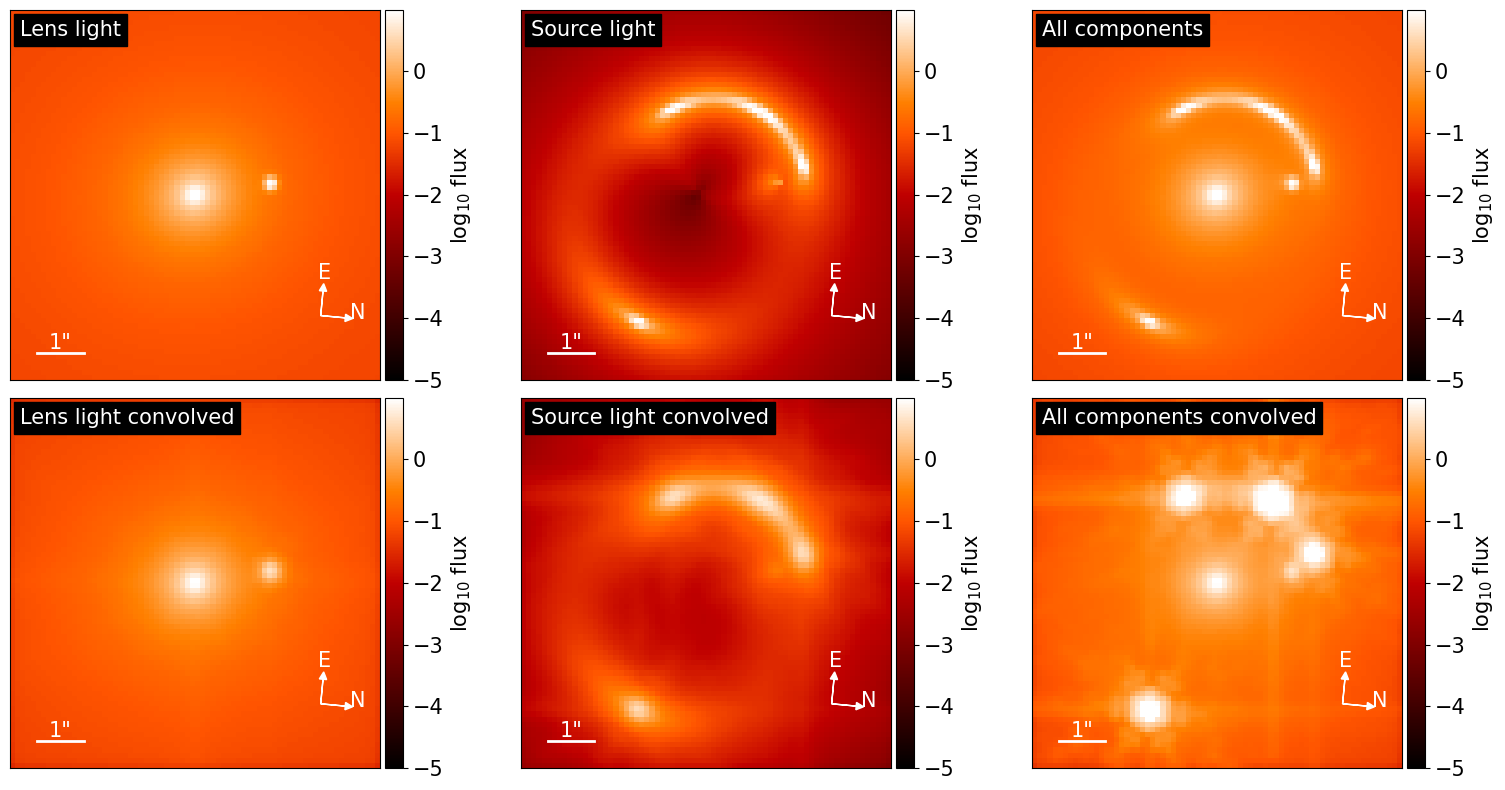

[{'theta_E': 2.1178010339183775, 'gamma': 2.1488294034986257, 'e1': -0.08323928920648195, 'e2': -0.045913923726029246, 'center_x': -0.012725465331397475, 'center_y': -0.2241834751272811, 'a1_a': 0.022518075137497266, 'delta_phi_m1': -0.005787571007954338, 'a3_a': 0.0, 'delta_phi_m3': 0.4377988884446635, 'a4_a': 0.0, 'delta_phi_m4': 2.0395730216191805}, {'gamma1': 0.04399660516420164, 'gamma2': 0.09505879387463385, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.3385155715464802, 'center_x': 0.3425847346969016, 'center_y': 1.5543024450945742}]
[{'amp': 5.67526291346652, 'R_sersic': 0.5585620833308579, 'n_sersic': 4.694717376728393, 'e1': -0.09436611058598687, 'e2': -0.21251638884650537, 'center_x': -0.4844267829083564, 'center_y': -0.13751843972371353}, {'amp': array([1977.42237951,  156.84115709,   44.50848504]), 'n_max': 1, 'beta': 0.040333635762293193, 'center_x': -0.4844267829083564, 'center_y': -0.13751843972371353}]
[{'amp': 10.893735629661888, 'R_sersic': 1.7379292921761427, 'n_sersic'

In [4]:
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
import matplotlib.pyplot as plt

multi_band_list = data.kwargs_data_joint['multi_band_list']
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="gist_heat",
                      image_likelihood_mask_list=[data.likelihood_mask_imaging_weights],fast_caustic=True)

param_class = fitting_sequence.param_class
print(param_class.num_param())
#print(chain_list)

for i in range(len(chain_list)):
    chain_plot.plot_chain_list(chain_list, i)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.data_plot(ax=axes[0,0])
modelPlot.model_plot(ax=axes[0,1])
modelPlot.normalized_residual_plot(ax=axes[0,2], v_min=-6, v_max=6)
modelPlot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100)
modelPlot.convergence_plot(ax=axes[1, 1], v_max=1)
modelPlot.magnification_plot(ax=axes[1, 2])
#f.tight_layout()
#f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
#plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.decomposition_plot(ax=axes[0,0], text='Lens light', lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,0], text='Lens light convolved', lens_light_add=True)
modelPlot.decomposition_plot(ax=axes[0,1], text='Source light', source_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,1], text='Source light convolved', source_add=True)
modelPlot.decomposition_plot(ax=axes[0,2], text='All components', source_add=True, lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,2], text='All components convolved', source_add=True, lens_light_add=True, point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()

#print(kwargs_result)
print(kwargs_result['kwargs_lens'])
print(kwargs_result['kwargs_source'])
print(kwargs_result['kwargs_lens_light'])